In [1]:
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [2]:
# setup
from helpers.cards import *
import helpers.plotting as pt
pt.enable_slide_theme()
pt.import_lato_font_in_notebook()

# How make a decision, if the means of two samples are significantly different?

## Generate a Population of 10,000,000 elements

In [72]:
np.random.seed(123)
df = pd.DataFrame({'pop_values': np.random.normal(100, 20, 100000)})

In [73]:
data = pt.df_to_datasource(df)

### Mean and standard deviation from the Population:

In [74]:
pop_mean = np.mean(df['pop_values'])
pop_sd = np.std(df['pop_values'])

pop_mean, pop_sd

(100.02629640350295, 19.991403538854666)

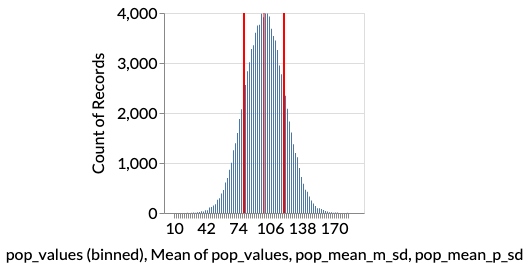

In [76]:
p_data = alt.Chart(
    data
).transform_joinaggregate(
    pop_m='mean(pop_values)',
    pop_sd='stdev(pop_values)',
).transform_calculate(
    pop_mean='datum.pop_m',
    pop_mean_m_sd='(datum.pop_m - datum.pop_sd)',
    pop_mean_p_sd='(datum.pop_m + datum.pop_sd)'
)

p = p_data.mark_bar().encode(
    alt.X('pop_values', bin=alt.Bin(maxbins=100)),
    y='count()',
)

p_mean = p_data.mark_rule(color='red').encode(
    x='pop_mean:Q'
)

pop_mean_m_sd = p_data.mark_rule(color='red').encode(
    x='pop_mean_m_sd:Q'
)

pop_mean_p_sd = p_data.mark_rule(color='red').encode(
    x='pop_mean_p_sd:Q'
)

p + p_m + pop_mean_m_sd + pop_mean_p_sd

In [ ]:
plt.figure()
plt.hist(pop, bins=100, density=True)
plt.axvline(x=pop_mean, color="orange")
plt.axvline(x=pop_mean - pop_sd, color="red")
plt.axvline(x=pop_mean + pop_sd, color="red")
plt.xlim(-50, 250)
plt.show()


## Drawing two random samples of 10 elements

In [ ]:
sample_n = 30
x1 = rd.sample(pop, sample_n)
x2 = rd.sample(pop, sample_n)

### Mean and standard deviation from the samples:

In [ ]:
x1_mean_hat = np.mean(x1)
x1_sd_hat = np.std(x1, ddof=1)

x1_mean_hat, x1_sd_hat

In [ ]:
x2_mean_hat = np.mean(x2)
x2_sd_hat = np.std(x2, ddof=1)

x2_mean_hat, x2_sd_hat

In [ ]:
plt.figure()
plt.hist(x1, bins=100, density=True)
plt.xlim(-50, 250)
plt.axvline(x=x1_mean_hat, color="orange")
plt.axvline(x=x1_mean_hat - x1_sd_hat, color="red")
plt.axvline(x=x1_mean_hat + x1_sd_hat, color="red")
plt.show()

In [ ]:
plt.figure()
plt.hist(x2, bins=100, density=True)
plt.xlim(-50, 250)
plt.axvline(x=x2_mean_hat, color="orange")
plt.axvline(x=x2_mean_hat - x2_sd_hat, color="red")
plt.axvline(x=x2_mean_hat + x2_sd_hat, color="red")
plt.show()

## Drawing 100 independent random samples from the population

In [ ]:
n_samples = 1000
xn_means =[np.mean(rd.sample(pop, sample_n)) for i in range(n_samples)]

### Mean and standard deviation from the sample means

In [ ]:
xn_means_mean_hat = np.mean(xn_means)
xn_means_sd_hat = np.std(xn_means)

xn_means_mean_hat, xn_means_sd_hat 

In [ ]:
plt.figure()
plt.hist(xn_means, bins=100, density=True)
plt.xlim(-50, 250)
plt.axvline(x=xn_means_mean_hat, color="orange")
plt.axvline(x=xn_means_mean_hat - xn_means_sd_hat, color="red")
plt.axvline(x=xn_means_mean_hat + xn_means_sd_hat, color="red")
plt.show()

## The standard deviation of the means can be derived differently and is generally called standard error!

### True standard error

In [ ]:
x_se = pop_sd / np.sqrt(sample_n)

x_se

### Estimated standard error purely from sample

In [ ]:
x1_se_hat = x1_sd_hat / np.sqrt(sample_n-1) # one df
x2_se_hat = x2_sd_hat / np.sqrt(sample_n-1)

x1_se_hat, x2_se_hat

In [ ]:
x_se, xn_means_sd_hat, x1_se_hat, x2_se_hat

## We can derive from the sample itself the standard error and thereby the precision of the sample mean!